<a href="https://colab.research.google.com/github/SumitNikhade/Machine-learning/blob/main/Implementation_of_Support_Vector_Machines_(SVM).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Implementation of Support Vector Machines (SVM) for classifying images of
handwritten digits into their respective numerical classes (0 to 9).

In [ ]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1)
X, y = mnist.data, mnist.target.astype(int)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
from sklearn.svm import SVC
svm_classifier = SVC(kernel='linear')
svm_classifier.fit(X_train, y_train)

SVC(kernel='linear')

In [ ]:
from sklearn.metrics import accuracy_score
y_pred = svm_classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9210714285714285


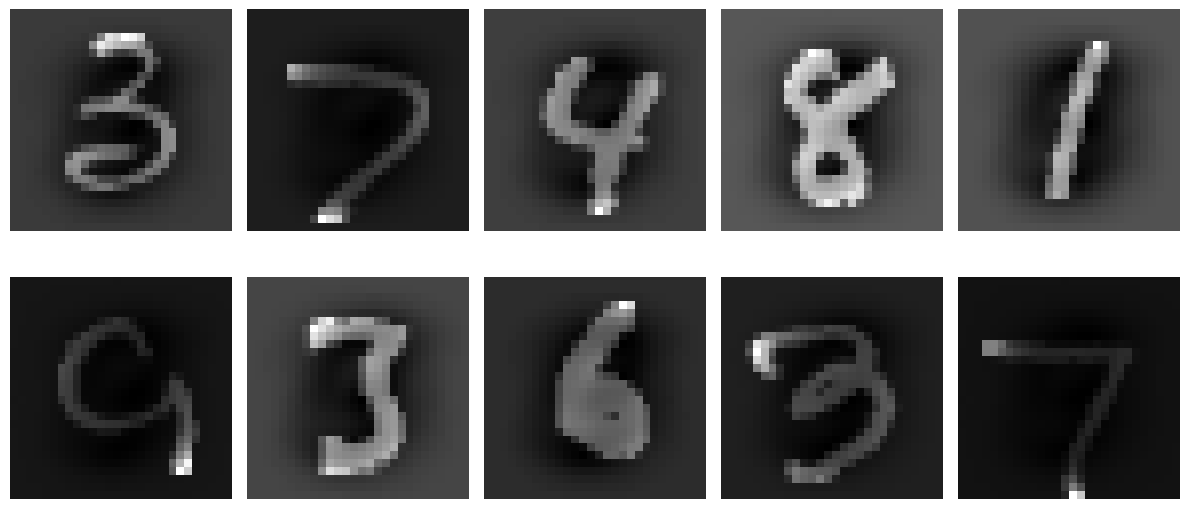

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

n_samples_to_visualize = 10
random_indices = np.random.randint(0, len(X_test), n_samples_to_visualize)

predicted_labels = svm_classifier.predict(X_test[random_indices])

plt.figure(figsize=(12, 6))
for i, idx in enumerate(random_indices):
    plt.subplot(2, 5, i + 1)
    plt.imshow(X_test[idx].reshape(28, 28), cmap='gray')
    plt.axis('off')

plt.tight_layout()
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_isomap.py:383: UserWarning: The number of connected components of the neighbors graph is 2 > 1. Completing the graph to fit Isomap might be slow. Increase the number of neighbors to avoid this issue.
  self._fit_transform(X)
/usr/local/lib/python3.10/dist-packages/scipy/sparse/_index.py:108: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])


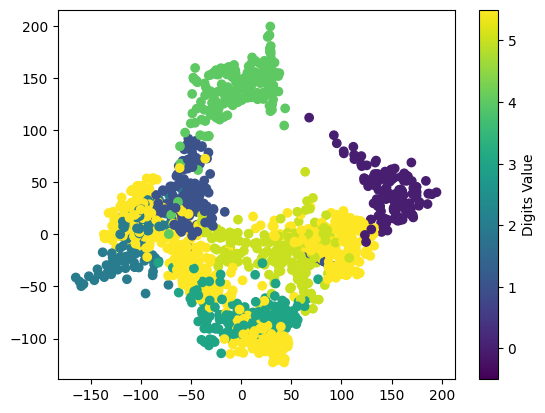

In [ ]:
from sklearn.manifold import Isomap
from sklearn.datasets import load_digits # Import load_digits to load the dataset

# Load the digits dataset
digits = load_digits()

iso = Isomap(n_components=2)
projection = iso.fit_transform(digits.data) # digits.data - 64 dimensions to 2

import matplotlib.pyplot as plt

plt.scatter(projection[:, 0], projection[:, 1], c=digits.target, cmap="viridis")
plt.colorbar(ticks=range(10), label='Digits Value')
plt.clim(-0.5, 5.5)

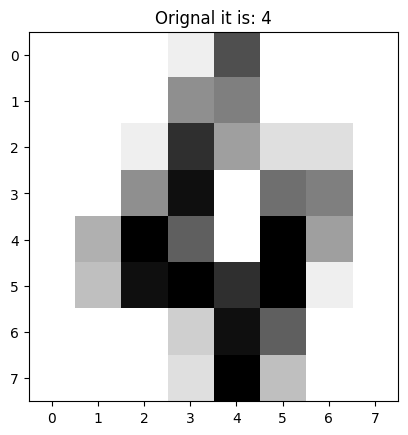

In [ ]:
def view_digit(index):
    plt.imshow(digits.images[index] , cmap = plt.cm.gray_r)
    plt.title('Orignal it is: '+ str(digits.target[index]))
    plt.show()
view_digit(4)

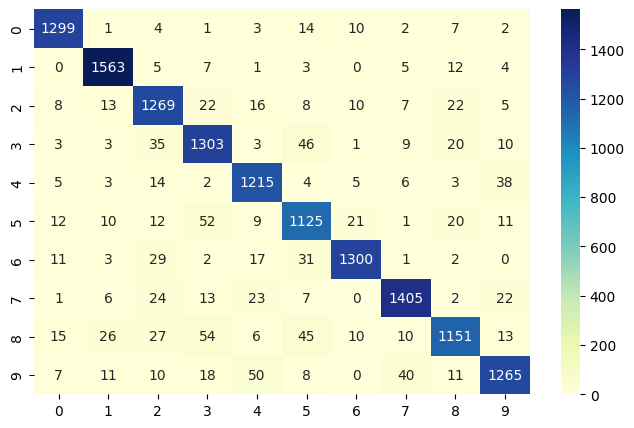

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'svm_classifier' is your trained model, 'X_test' your test data and 'y_test' your test labels
predictions = svm_classifier.predict(X_test)  # Generate predictions

# Use y_test instead of targets assuming y_test contains the ground truth labels for X_test
cm = confusion_matrix(y_test, predictions) # Assuming y_test has shape (14000,)
conf_matrix = pd.DataFrame(data=cm)

plt.figure(figsize=(8, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap="YlGnBu")
plt.show()